**Aim of this notebook :** we know that in multivariate situation, the covariance matrix (or "correlation matrix") defined by $$\Sigma=\mathbb{E}((X-\mathbb{E}(X))(X-\mathbb{E}(X))^{T})$$ modifies the curve of gaussian distributions : the halo of most probable values is extended in some directions and crushed in others. But do these directions depend on the eigenvectors of $\Sigma$ ? How ?

Here, we focus on the code : see Gaussian.pdf for calculations and other explanations.

Libraries :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

Core program :

In [ ]:
def plot_gaussian_with_eigenvectors(mu_x, mu_y, sigma_xx, sigma_yy, sigma_xy):
    # Vector of means (center of the Gaussian)
    mu = np.array([mu_x, mu_y])

    # Correlation (covariance) matrix
    cov_matrix = np.array([[sigma_xx, sigma_xy],
                           [sigma_xy, sigma_yy]])

    # Eigenvalues, unit eigenvectors of cov_matrix
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)

    # Check
    print("Check : if everything normal, we have the correlation matrix here :")
    print(eigvecs.T @ np.diag(eigvals) @ eigvecs)

    # Eigenvalues, unit eigenvectors of inverse of cov_matrix
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    inv_eigvals, inv_eigvecs = np.linalg.eigh(inv_cov_matrix)

    # Check
    print("Check : if everything normal, we have the correlation matrix here :")
    intermediate = inv_eigvecs.T @ np.diag(inv_eigvals) @ inv_eigvecs
    print(np.linalg.inv(intermediate))

    # Grid of points
    x, y = np.linspace(mu_x - 3*np.sqrt(sigma_xx), mu_x + 3*np.sqrt(sigma_xx), 100), \
           np.linspace(mu_y - 3*np.sqrt(sigma_yy), mu_y + 3*np.sqrt(sigma_yy), 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # Probability densité PDF
    rv = multivariate_normal(mu, cov_matrix)
    Z = rv.pdf(pos)

    # Graphics
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Density')

    # unit eigenvectors of inv cov matrix multiplied by the square root of the respective eigenvalue (of the inv cov matrix)
    for i in range(2):
       inv_vec = inv_eigvecs[:, i] * np.sqrt(inv_eigvals[i])
       plt.quiver(mu_x, mu_y, inv_vec[0], inv_vec[1], color='red', scale=1, scale_units='xy', angles='xy', linestyle='dashed', label=f'Eigenvector {i+1} (inv corr matrix)')

    # to ensure that both axis have same scale (otherwise right angles wouldn't be right, and this is not good)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Bivariate Gaussian with eigenvectors')
    plt.show()

User interface :    

---
Settings : mu_x=0, mu_y=0, sigma_xx=2, sigma_yy=1, sigma_xy=-0.7

Check : if everything normal, we have the correlation matrix here :
[[ 2.  -0.7]
 [-0.7  1. ]]
Check : if everything normal, we have the correlation matrix here :
[[ 2.  -0.7]
 [-0.7  1. ]]


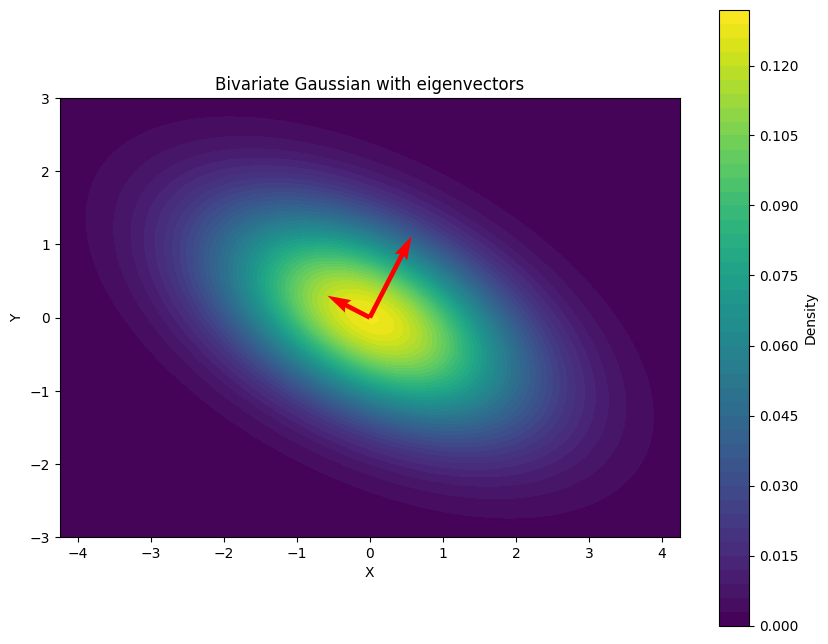

In [ ]:
plot_gaussian_with_eigenvectors(mu_x=0, mu_y=0, sigma_xx=2, sigma_yy=1, sigma_xy=-0.7)

As a reminder, each red vector represents a unit eigenvector of the inverse of the correlation matrix multiplied by the square root of the corresponding eigenvalue (eigenvalue of the inverse of the correlation matrix).

**Observation:** the longer the red vector, the more the halo is crushed in that direction. On the contrary, the shorter the red vector, the more the halo is extended in that direction. I propose to justify this conjecture in Gaussian.pdf.

Now that I verified this conjecture, let's compute the iso-curves.

In [55]:
def plot_gaussian_with_eigenvectors(mu_x, mu_y, sigma_xx, sigma_yy, sigma_xy):
    # Vector of means (center of the Gaussian)
    mu = np.array([mu_x, mu_y])

    # Correlation (covariance) matrix
    cov_matrix = np.array([[sigma_xx, sigma_xy],
                           [sigma_xy, sigma_yy]])

    # Eigenvalues, unit eigenvectors of cov_matrix
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)

    # Check
    print("Check : if everything normal, we have the correlation matrix here :")
    print(eigvecs.T @ np.diag(eigvals) @ eigvecs)

    # Eigenvalues, unit eigenvectors of inverse of cov_matrix
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    inv_eigvals, inv_eigvecs = np.linalg.eigh(inv_cov_matrix)

    # Check
    print("Check : if everything normal, we have the correlation matrix here :")
    intermediate = inv_eigvecs.T @ np.diag(inv_eigvals) @ inv_eigvecs
    print(np.linalg.inv(intermediate))

    # isocurve
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 2, 100)
    X1, X2 = np.meshgrid(x1, x2)
    F = np.zeros_like(X1)
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            x = np.array([X1[i, j], X2[i, j]])
            F[i, j] = x.T @ inv_cov_matrix @ x
    plt.contourf(X1, X2, F, levels=10, cmap='viridis')

    # unit eigenvectors of inv cov matrix multiplied by the square root of the respective eigenvalue (of the inv cov matrix)
    for i in range(2):
       inv_vec = inv_eigvecs[:, i] * np.sqrt(inv_eigvals[i])
       plt.quiver(mu_x, mu_y, inv_vec[0], inv_vec[1], color='red', scale=1, scale_units='xy', angles='xy', linestyle='dashed', label=f'Eigenvector {i+1} (inv corr matrix)')

    # to ensure that both axis have same scale (otherwise right angles wouldn't be right, and this is not good)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('isocurves with eigenvectors')
    plt.show()

Check : if everything normal, we have the correlation matrix here :
[[ 2.  -0.7]
 [-0.7  1. ]]
Check : if everything normal, we have the correlation matrix here :
[[ 2.  -0.7]
 [-0.7  1. ]]


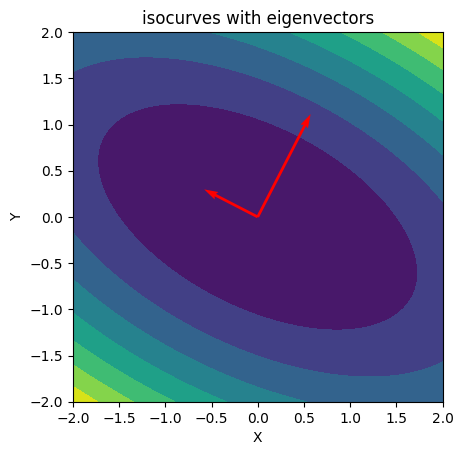

In [56]:
plot_gaussian_with_eigenvectors(mu_x=0, mu_y=0, sigma_xx=2, sigma_yy=1, sigma_xy=-0.7)